In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/kaggle/input/titanic/train_and_test2.csv")

# Display first 5 rows
df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [5]:
df.isnull().sum()


Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [6]:
mean_age = np.mean(df['Age'])
df['Age'] = df['Age'].fillna(mean_age)


In [7]:
df.isnull().sum()


Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [28]:
gender_survival = df.groupby('Sex')['2urvived'].mean()
print(gender_survival)


Sex
0    0.1293
1    0.5000
Name: 2urvived, dtype: float64


In [29]:
class_survival = df.groupby('Pclass')['2urvived'].mean()
print(class_survival)


Pclass
1    0.421053
2    0.314079
3    0.167842
Name: 2urvived, dtype: float64


In [31]:
bins = np.array([0, 12, 20, 40, 60, 80])
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_survival = df.groupby('AgeGroup').mean()
print(age_survival)


            Passengerid        Age       Fare       Sex     sibsp  zero  \
AgeGroup                                                                  
Child        614.127660   4.911383  30.095255  0.468085  1.712766   0.0   
Teen         634.162338  17.587662  28.371999  0.422078  0.551948   0.0   
Adult        656.648681  28.634892  29.192150  0.334532  0.384892   0.0   
Middle Age   688.247423  48.505155  51.948691  0.365979  0.391753   0.0   
Senior       631.545455  65.393939  58.860609  0.212121  0.303030   0.0   

            zero.1  zero.2  zero.3  zero.4  ...  zero.12  zero.13  zero.14  \
AgeGroup                                    ...                              
Child          0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
Teen           0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
Adult          0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
Middle Age     0.0     0.0     0.0     0.0  ...      0.0      0.0      0.0   
Senior

/tmp/ipykernel_55/460700324.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup').mean()


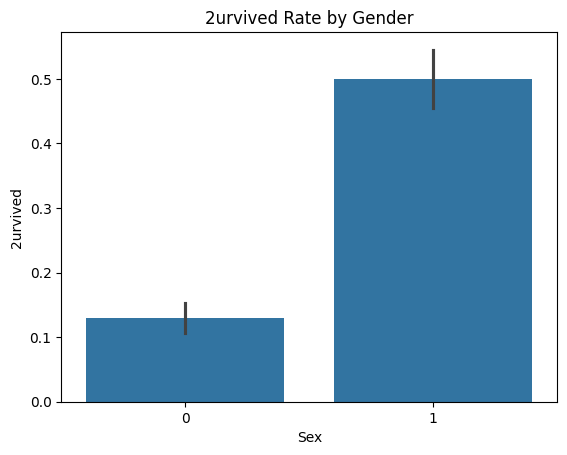

In [22]:
sns.barplot(x='Sex', y='2urvived', data=df)
plt.title("2urvived Rate by Gender")
plt.show()


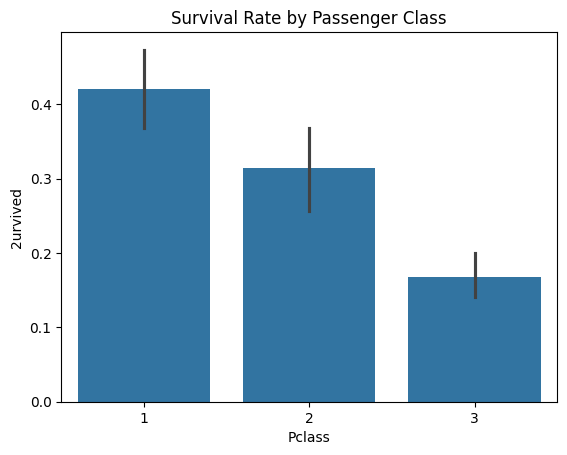

In [33]:
sns.barplot(x='Pclass', y='2urvived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


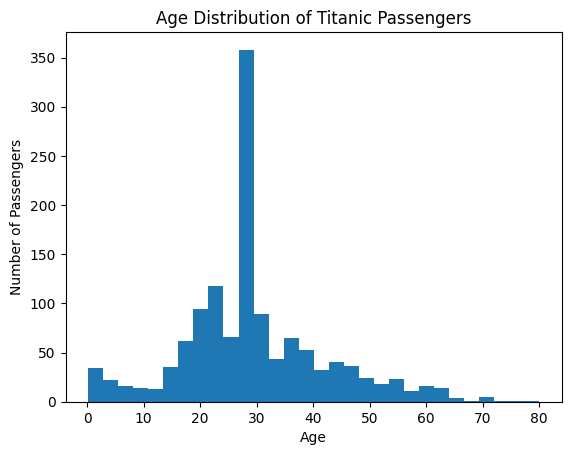

In [34]:
plt.hist(df['Age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Titanic Passengers")
plt.show()
